<a href="https://colab.research.google.com/github/wasiq921/Task-3-ADVANCED-LEVEL--LGM-VIP-AUGUST-2021/blob/main/Task_1_(ADVANCED_LEVEL_TASK)_LGM_VIP_AUGUST_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Develop A Neural Network That Can Read Handwriting

### Neural network machine learning project with the MNIST Handwritten Dataset using Tensorflow and CNN

## Author: Muhammad Wasiq
##LGM VIP AUGUST 2021


In [ ]:
#importing all the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [ ]:
#loading the MNIST dataset
(X_train,Y_train),(X_test,Y_test)= datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", Y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", Y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


We have successfully loaded our Dataset, 60000 images for training and 10000 images for testing

In [ ]:
#Normalization
X_train=X_train/255
X_test=X_test/255

In [ ]:
#reshaping the X_train and X_test Dataset
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

Training Model using CNN

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 29s 240ms/step - loss: 2.0736 - accuracy: 0.3325
Epoch 2/10
118/118 [==============================] - 28s 238ms/step - loss: 0.7806 - accuracy: 0.7691
Epoch 3/10
118/118 [==============================] - 28s 238ms/step - loss: 0.4947 - accuracy: 0.8522
Epoch 4/10
118/118 [==============================] - 28s 239ms/step - loss: 0.4098 - accuracy: 0.8762
Epoch 5/10
118/118 [==============================] - 28s 237ms/step - loss: 0.3589 - accuracy: 0.8915
Epoch 6/10
118/118 [==============================] - 28s 234ms/step - loss: 0.3241 - accuracy: 0.9022
Epoch 7/10
118/118 [==============================] - 28s 235ms/step - loss: 0.2919 - accuracy: 0.9124
Epoch 8/10
118/118 [==============================] - 28s 234ms/step - loss: 0.2633 - accuracy: 0.9214
Epoch 9/10
118/118 [==============================] - 28s 237ms/step - loss: 0.2376 - accuracy: 0.9288
Epoch 10/10
118/118 [==============================] - 28s 237ms/step - l

In [ ]:
#Model Comiled Successfully, It's time for Testing
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1908 - accuracy: 0.9451


[0.1908228099346161, 0.9451000094413757]

In [ ]:
Y_pred=[]
pred=model.predict(X_test)
for element in pred:
    Y_pred.append(np.argmax(element))

In [ ]:
Y_pred=np.array(Y_pred)
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
Y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[ 965,    0,    1,    2,    0,    7,    3,    1,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    1,   10,    0],
       [   4,    0,  971,   16,    3,    3,    5,   14,   14,    2],
       [   2,    2,   11,  964,    0,   15,    0,    5,    7,    4],
       [   1,    3,    7,    3,  916,    1,   15,    2,    2,   32],
       [   6,    3,    2,   31,    4,  829,    7,    2,    4,    4],
       [   9,    4,    5,    1,    2,   20,  914,    1,    2,    0],
       [   0,    4,   27,    6,    0,    3,    0,  971,    3,   14],
       [  10,    3,    4,   35,    5,   25,    6,    6,  866,   14],
       [   9,    7,    4,   14,   14,    7,    0,    6,    7,  941]])

Our Model is trained and tested, Now we will plot the predicted values to compare with test data

In [ ]:
X_test=X_test.reshape(10000,28,28)

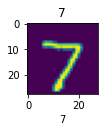

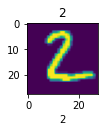

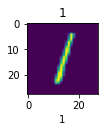

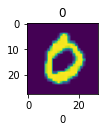

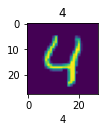

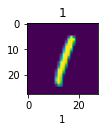

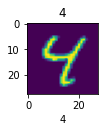

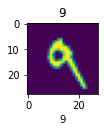

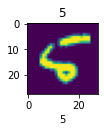

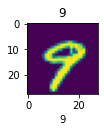

In [ ]:
for i in range(0,10):
    plt.figure(figsize=(15,10))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_pred[i])
    plt.title(Y_test[i])

In [ ]:
actual=Y_test
predicted=Y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
